In [2]:
import csv
import random
import sys

import numpy
import os  # We need this module
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.datasets.samples_generator import make_blobs
sns.set()  # for plot styling
plt.style.use('seaborn-whitegrid')

#Samples
N_SAMPLES = 100000

# Get path of the current dir, then use it to create paths:
CURRENT_DIR = os.path.dirname(os.path.abspath("flink_k-means.ipynb"))
points_path = os.path.join(CURRENT_DIR, 'points.csv')
centroids_path = os.path.join(CURRENT_DIR, 'centroids.csv')
new_points_path = os.path.join(CURRENT_DIR, 'new_points.csv')
new_centroids_path = os.path.join(CURRENT_DIR, 'new_centroids.csv')

fig_width = 12
fig_height = 10

# Plot starting dataset

## Plot points

In [7]:
print('X,Y')
with open(points_path) as csvfile:
    reader = csv.DictReader(csvfile)
    for i,row in enumerate(reader):
        print(row['X'], row['Y'])
        if(i >= 10):
            break
            
print("Total points: %s" % format(N_SAMPLES,',d'))

X,Y
-6.030655427827744 7.010503797942845
1.44888315638322 5.649841687086858
5.2113349965879365 5.111332892148602
8.169049731285268 -3.0299071227666934
-6.7566857968809675 0.5102043195659359
-6.565675459872967 0.2973336285548338
-5.0923491919544706 7.200424641047177
-9.28377274405066 -4.471524504982716
8.885145705359779 -2.2490604605130797
-10.541767848895473 -5.948723542953223
-5.506572521654158 8.263395622666037
Total points: 100,000


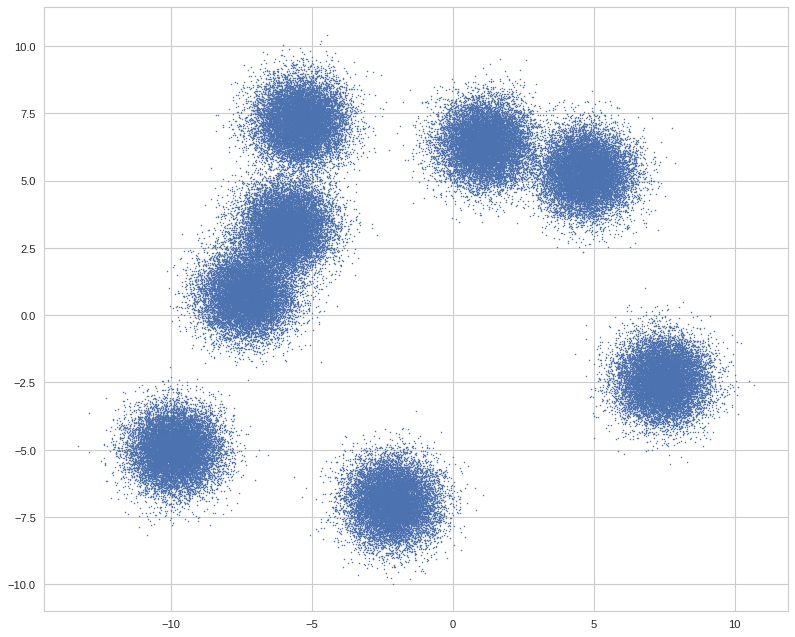

In [8]:
x = numpy.zeros(N_SAMPLES)
y = numpy.zeros(N_SAMPLES)

#Read the dataset from the CVS file
with open(points_path) as csvfile:
    reader = csv.DictReader(csvfile)
    i = 0
    for row in reader:
        x[i] = row['X']
        y[i] = row['Y']
        #print(x[i], y[i])
        i=i+1

#Plot the read dataset
plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x[:], y[:], s=1)
plt.show()

## Plot centroids

### Add header row to centroids

In [ ]:
with open(centroids_path, 'r+') as f:
    content = f.read()
    f.seek(0, 0)
    f.write('Cluster,X,Y'+ '\n' + content)

In [9]:
print('Cluster,X,Y')
centroids = 0
with open(centroids_path) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row['Cluster'], row['X'], row['Y'])
        centroids = centroids + 1
print("Total centroids: %d" % centroids)

Cluster,X,Y
0 -9.398966237511003 4.340813546508237
1 -7.958589140441471 -7.836527084523737
2 -14.963891571978209 -10.564084710629583
3 10.352816750874645 -9.318377188349789
4 10.775524874995043 -7.851662420074654
5 0.035490624626678624 3.877998696347902
6 -2.111326166595642 -6.336905931572618
7 -13.453822999941348 13.330249306685019
Total centroids: 8


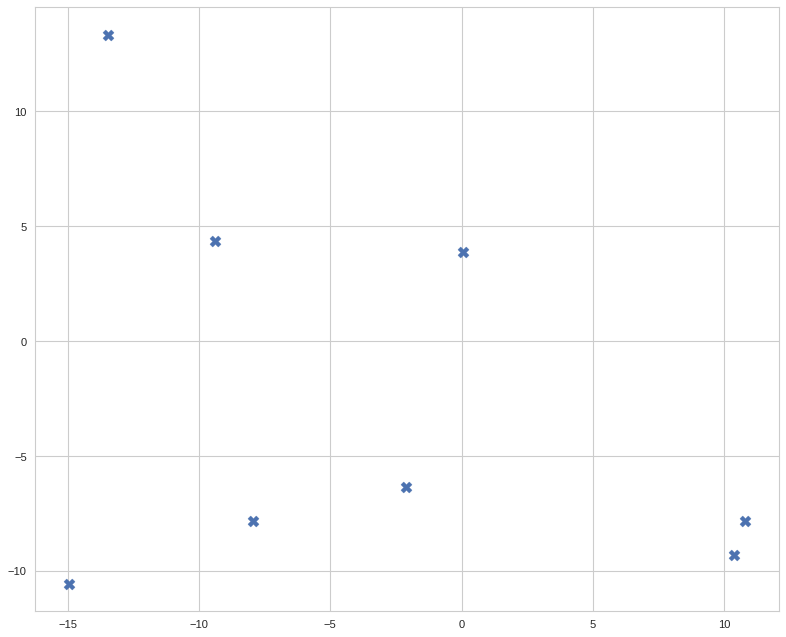

In [10]:
x = numpy.zeros(centroids)
y = numpy.zeros(centroids)

#Read the dataset from the CVS file
with open(centroids_path) as csvfile:
    reader = csv.DictReader(csvfile)
    i = 0
    for row in reader:
        x[i] = row['X']
        y[i] = row['Y']
        #print(x[i], y[i])
        i=i+1

#Plot the read dataset
plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x[:], y[:], marker="X", s=100)
plt.show()

# Run Flink

# Plot result dataset

### Add header row to files

In [ ]:
with open(new_centroids_path, 'r+') as f:
    content = f.read()
    f.seek(0, 0)
    f.write('Cluster,X,Y'+ '\n' + content)
    
with open(new_points_path, 'r+') as f:
    content = f.read()
    f.seek(0, 0)
    f.write('Cluster,X,Y'+ '\n' + content)

## Plot new centroids

In [11]:
print('Cluster,X,Y')
centroids = 0
with open(new_centroids_path) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row['Cluster'], row['X'], row['Y'])
        centroids = centroids + 1
print("Total centroids: %d" % centroids)

Cluster,X,Y
2 -11.210403032871643 -4.9390665614605895
4 7.429292919115221 -2.4146403354729955
0 -6.200853981284802 3.7898163018572406
1 -9.65316929299738 -4.860704211213356
5 2.9242531901220223 5.818019312818126
6 -2.1603998203800137 -6.949758613119199
Total centroids: 6


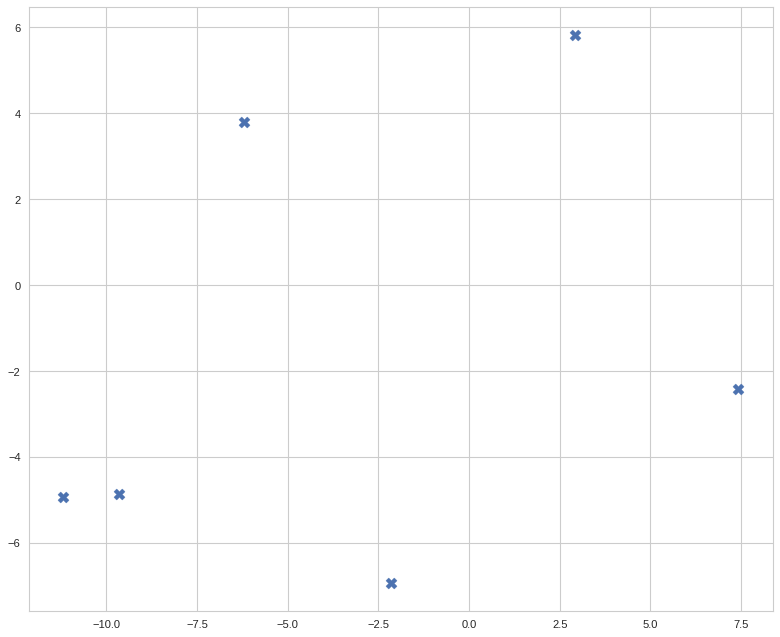

In [13]:
x = numpy.zeros(centroids)
y = numpy.zeros(centroids)

#Read the dataset from the CVS file
with open(new_centroids_path) as csvfile:
    reader = csv.DictReader(csvfile)
    i = 0
    for row in reader:
        x[i] = row['X']
        y[i] = row['Y']
        #print(x[i], y[i])
        i=i+1
        
#Plot the read dataset
plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x[:], y[:], marker="X", s=100)
plt.show()

## Plot points + new centroids

0 6
No: 6


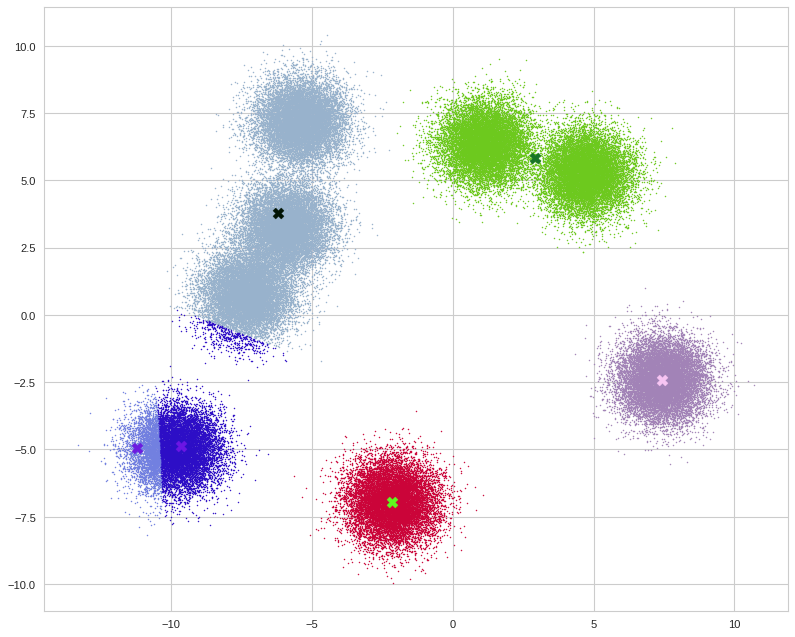

In [16]:
x = numpy.zeros(N_SAMPLES)
y = numpy.zeros(N_SAMPLES)
c = numpy.zeros(N_SAMPLES)
cx = list()
cy = list()
cc = list()

plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')

# Read the new centroids from the CVS file
with open(new_centroids_path) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        cx.append(float(row['X']))
        cy.append(float(row['Y']))
        cc.append(int(row['Cluster']))

# Read the new dataset from the CVS file
with open(new_points_path) as csvfile:
    reader = csv.DictReader(csvfile)
    i = 0
    for row in reader:
        x[i] = row['X']
        y[i] = row['Y']
        c[i] = row['Cluster']
        # print(x[i], y[i])
        i = i + 1

minK = (int)(c.min())
maxK = (int)(c.max())
print (minK, maxK)

k = (int)(maxK - minK + 1)

# plot the points for each cluster with a different color
for i in range(minK, maxK+1):
    x2 = list()
    y2 = list()

    for j in range(N_SAMPLES):
        if c[j] == i:
            x2.append(x[j])
            y2.append(y[j])

    # Plot the read dataset
    color1 = numpy.random.rand(3,)
    plt.scatter(x2[:], y2[:], c=color1, s=1)
        
for i in range(maxK+1):
    color2 = numpy.random.rand(3,)
    try:
        plt.scatter(cx[i], cy[i], c=color2, marker="X", edgecolor=color2, s=100)
    except:
        print ("No: %d" % i)

plt.show()

## Compute objective function

In [19]:
import math

# read the clusters
clusters = list()
with open(new_centroids_path) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        clusters.append([int(row['Cluster']), float(row['X']), float(row['Y'])])
    
print ("Clusters: %d" % len(clusters))

points = list()
with open(new_points_path) as csvfile:
    reader = csv.DictReader(csvfile)
    i = 0
    for row in reader:
        cp = int(row['Cluster'])
        xp = float(row['X'])
        yp = float(row['Y'])
        points.append([cp, xp, yp])
        
print ("Points: %d " % len(points))
        
# compute the distances and the objective function      
distances = list()
for point in points:
    for cluster in clusters:
        if (cluster[0] == point[0]):
            distance = math.sqrt((point[1] - cluster[1]) * (point[1] - cluster[1]) 
                                 + (point[2] - cluster[2]) * (point[2] - cluster[2]))
            distance = math.pow(distance, 2)
            distances.append(distance)

print ("Distances: %d " % len(distances))

print ("Obj function: %f" % sum(distances))

Clusters: 6
Points: 100000 
Distances: 100000 
Obj function: 499419.890892


# Create new dataset

KeyboardInterrupt: 

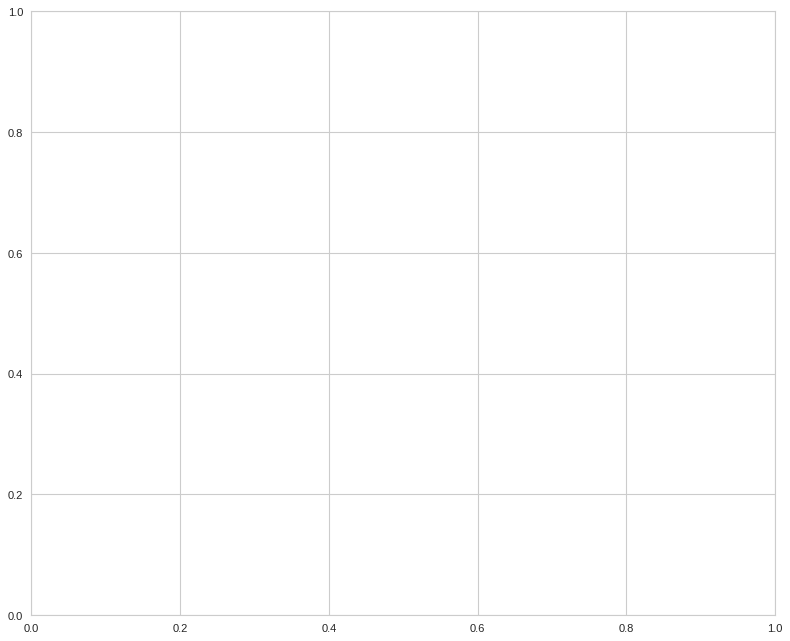

In [9]:
#X, y_true = make_blobs(n_samples=N_SAMPLES, centers=4, cluster_std=0.60, random_state=3320)
#X, y_true = make_blobs(n_samples=N_SAMPLES, centers=4, cluster_std=0.60)
X, y_true = make_blobs(n_samples=10000000, centers=8, cluster_std=0.80)

plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.show()

## Save dataset to file

In [8]:
with open(points_path, 'w') as csvfile:
    fieldnames = ['X', 'Y']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for x in range(N_SAMPLES):
        writer.writerow({'X': X[x, 0], 'Y': X[x, 1]})

# Results

### Relation between number of centroids and obj function value

- Add one centroid at a time
- Dataset with 8 centers
- Fixed points
- Max iterations = 10
- No custom aggregator convergence

  i            ObjVal
---  ----------------
  1       5.90974e+06
  2       3.39726e+06
  3       1.63413e+06
  4  901302
  5  503544
  6  498386
  7  259840
  8  254725
  9  166181
 10  115524


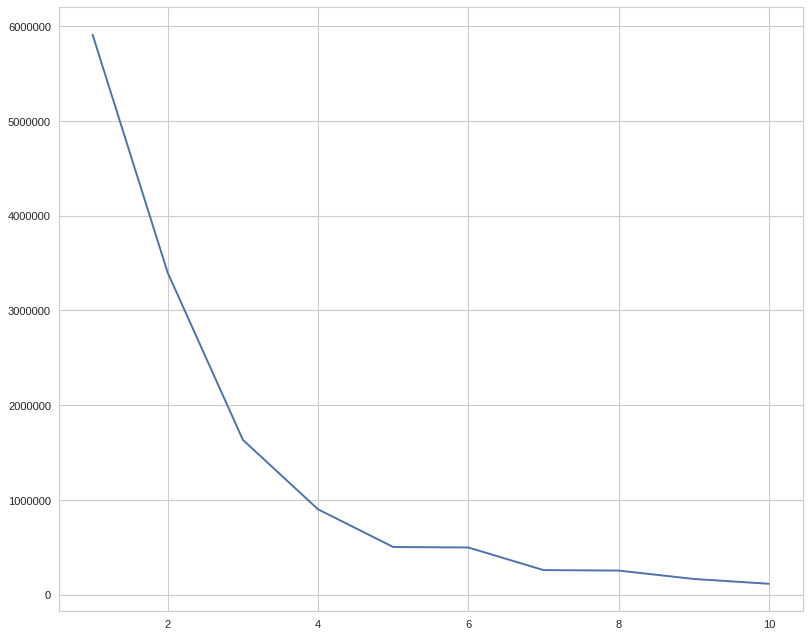

In [22]:
objval = list()
mink = 1
maxk = 11

for i in range(mink, maxk):
    fixed_path_objfun = os.path.join(CURRENT_DIR, './results/fixed-centroids/' + str(i) + '/objfun.csv')
    with open(fixed_path_objfun) as f:
        content = f.readlines()
    content = [x.strip() for x in content]

    objval.append([i, float(content[0])])

from tabulate import tabulate
print (tabulate(objval, headers=['i', 'ObjVal']))

x_val = [x[0] for x in objval]
y_val = [x[1] for x in objval]

plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x_val,y_val)
plt.show()

### Relation between initial distance of centroids and obj function value

- Fixed number of centroids (8) randomly generated
- Dataset with 8 centers
- Fixed points
- Max iterations = 3
- No custom aggregator convergence
- Incresing recompnearest, to recompute nearest centroids n-times

  i    ObjVal
---  --------
  0    499420
  1    268717
  2    221054
  3    197084
  4    180900
  5    193745


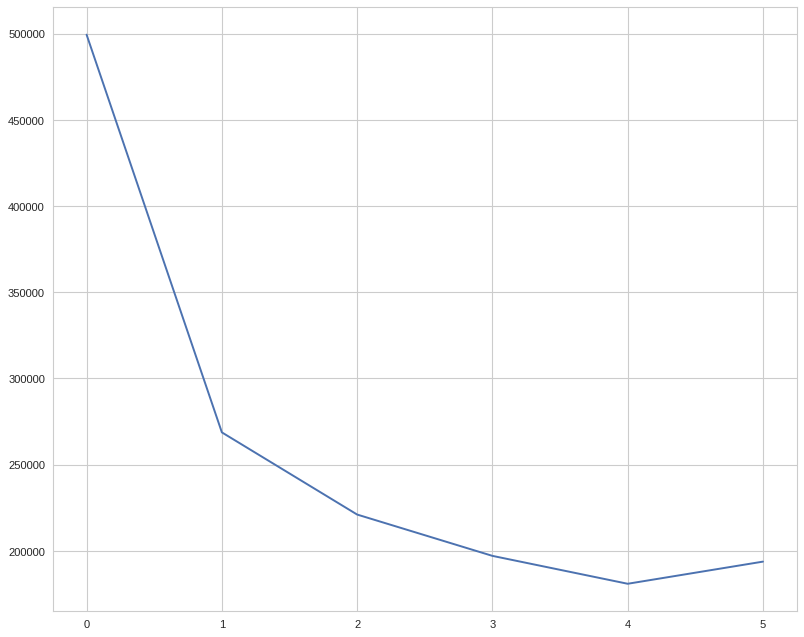

In [24]:
objval = list()
mink = 0
maxk = 6

for i in range(mink, maxk):
    fixed_path_objfun = os.path.join(CURRENT_DIR, './results/random-centroids/' + str(i) + '/objfun.csv')
    with open(fixed_path_objfun) as f:
        content = f.readlines()
    content = [x.strip() for x in content]

    objval.append([i, float(content[0])])

from tabulate import tabulate
print (tabulate(objval, headers=['i', 'ObjVal']))

x_val = [x[0] for x in objval]
y_val = [x[1] for x in objval]

plt.figure(figsize=(fig_width, fig_height), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x_val,y_val)
plt.show()